Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset C:/Users/kanik/Documents/upgrade-python-classes/Deep_learning/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration
data_dir_train = pathlib.Path("C:/Users/kanik/Documents/upgrade-python-classes/Deep_learning/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Train/") 
data_dir_test =  pathlib.Path("C:/Users/kanik/Documents/upgrade-python-classes/Deep_learning/Convolutional-Neural-Networks-main/Melanoma Detection Assignment/Test/")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
# getting the exact paths of each image in train data folder
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(path_list)

['C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\ISIC_0025825.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\ISIC_0025953.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\ISIC_0025957.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Netw

In [6]:
# getting the classes of each image dataset based on the folder name as per the skin cancer name
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*', '*.jpg'))]
print(lesion_list)

['actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic keratosis', 'actinic ker

In [7]:
# creating a dictionary to prepare a dataframe
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [8]:
original_df.head()

,Path,Label
0,C:\Users\kanik\Documents\upgrade-python-classe...,actinic keratosis
1,C:\Users\kanik\Documents\upgrade-python-classe...,actinic keratosis
2,C:\Users\kanik\Documents\upgrade-python-classe...,actinic keratosis
3,C:\Users\kanik\Documents\upgrade-python-classe...,actinic keratosis
4,C:\Users\kanik\Documents\upgrade-python-classe...,actinic keratosis


In [9]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
# from keras.preprocessing import image_dataset_from_directory
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    labels='inferred',
    batch_size=batch_size, 
    image_size=(img_height, img_width), 
    seed=123,
    validation_split=0.2, 
    subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                          labels='inferred',
                                                          batch_size=batch_size,
                                                          image_size=(img_height, img_width), 
                                                          validation_split = 0.2,
                                                          subset='validation',
                                                          seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
num_classes = len(class_names)
print( "Classes :: {} & No of classes::{}".format(class_names, num_classes))

Classes :: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] & No of classes::9


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

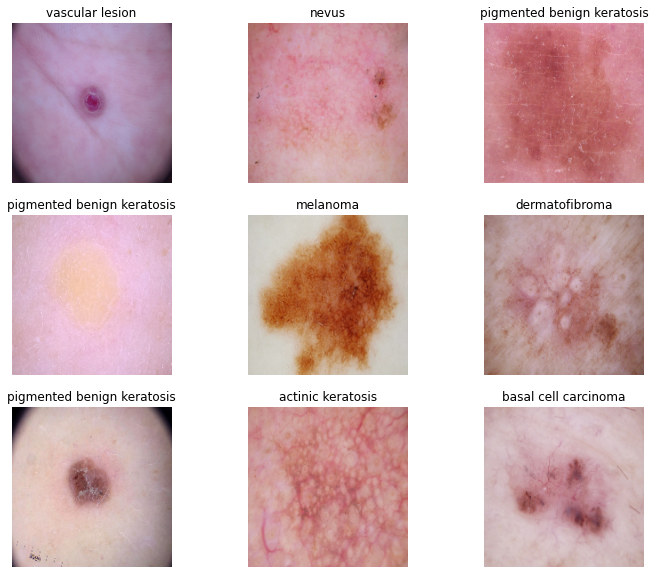

In [14]:
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model I : Simple model

### Create the model

#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
     # maxpooling layer
  layers.MaxPooling2D(),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(num_classes,activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 179ms/step - loss: 1.8988 - accuracy: 0.2958 - val_loss: 1.6995 - val_accuracy: 0.3758
Epoch 2/20
56/56 [==============================] - 10s 174ms/step - loss: 1.6336 - accuracy: 0.4263 - val_loss: 1.5570 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 10s 177ms/step - loss: 1.4320 - accuracy: 0.5022 - val_loss: 1.4614 - val_accuracy: 0.4698
Epoch 4/20
56/56 [==============================] - 10s 180ms/step - loss: 1.3641 - accuracy: 0.5234 - val_loss: 1.3829 - val_accuracy: 0.5347
Epoch 5/20
56/56 [==============================] - 10s 180ms/step - loss: 1.2862 - accuracy: 0.5413 - val_loss: 1.4507 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 10s 183ms/step - loss: 1.2467 - accuracy: 0.5586 - val_loss: 1.4888 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 10s 184ms/step - loss: 1.1088 - accuracy: 0.6066 - val_loss: 1.5688 - val_accuracy: 0.5034

### Visualizing training results

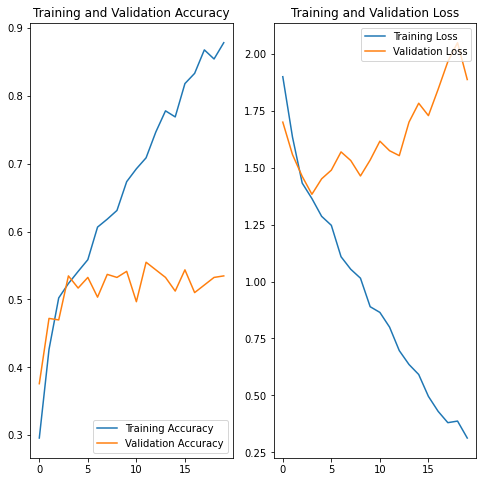

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings from the graph and model history

#### Cleraly we can see that the model is overfitting the train accuracy is 87% and the validation accuracy is only 57%

#### One of the reasons of overfitting could be lack of sufficient images as we know that CNN model require huge amount of images to learn, hence it looks like the model is memorizing the train images and therefore leading to overfitting

### Data Augmentation

In [21]:

# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# To handle the overfitting scenario above we can add some dynamic data augmenttaion like 
# - Random flipping
# - Random rotaion
# - Random zoom

# this data augmentation layer will prevent the model from memorizing the train data and hence we can handle overfiting

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

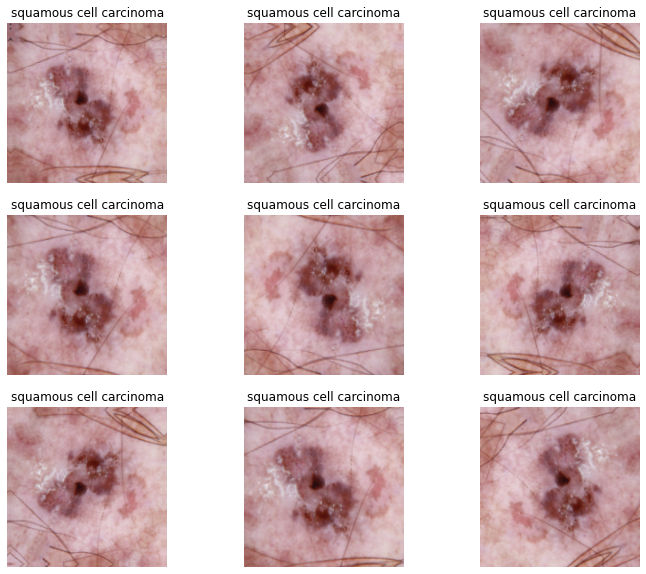

In [22]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

### Todo : Model II with Data augmentation layer
### Create the model, compile and train the model


In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

# Buildinf a sequential model with  data augmentation, rescaling and 3 conv layers and 2 dense layers with softmax as output activation
model = Sequential([
    # data augmentation layer
  data_augmentation,
    # Rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpoolig layer
  layers.MaxPooling2D(),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output layer
  layers.Dense(num_classes,activation='softmax')
])


### Compiling the model

In [24]:
## compiling the model with adam optimizer and sparse_categorical_crossentropy as loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model Summary

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [26]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 15s 234ms/step - loss: 2.0919 - accuracy: 0.2333 - val_loss: 1.8700 - val_accuracy: 0.3445
Epoch 2/20
56/56 [==============================] - 13s 233ms/step - loss: 1.7450 - accuracy: 0.3711 - val_loss: 1.5995 - val_accuracy: 0.4228
Epoch 3/20
56/56 [==============================] - 13s 237ms/step - loss: 1.5599 - accuracy: 0.4537 - val_loss: 1.4733 - val_accuracy: 0.5034
Epoch 4/20
56/56 [==============================] - 13s 238ms/step - loss: 1.4215 - accuracy: 0.4972 - val_loss: 1.4664 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 13s 233ms/step - loss: 1.3598 - accuracy: 0.5285 - val_loss: 1.5165 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 13s 232ms/step - loss: 1.3539 - accuracy: 0.5268 - val_loss: 1.4275 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 13s 232ms/step - loss: 1.3137 - accuracy: 0.5413 - val_loss: 1.4266 - val_accuracy: 0.5034

### Visualizing the results

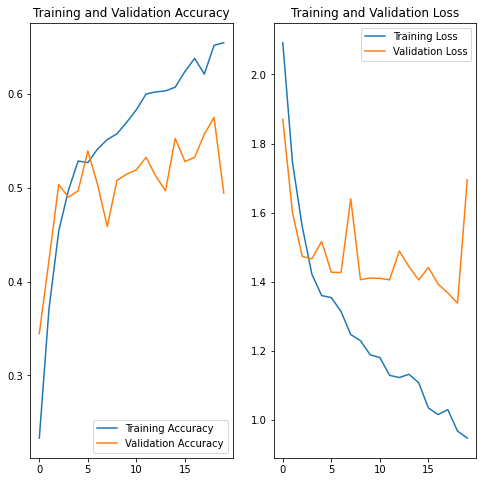

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

There has been a considerable improvement now as compared to the previous model as we can see from the train and validation accuracy that the model overfitting has been handled, but the model performance is not so good only 94% train and 59% validation accuracy


One reason could be class imbalance

#### **Todo:** Find the distribution of classes in the training dataset.

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

*** Plotting graph to detect class imbalance ***

In [28]:
# creating the dictionary and dataframe of original train data to plot a bar graph to check the class imbalance
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))   
print(image_dict) 

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [29]:
# creating dataframe containing count of images per class
df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts

print(df)

                        class  count
0           actinic keratosis    114
1        basal cell carcinoma    376
2              dermatofibroma     95
3                    melanoma    438
4                       nevus    357
5  pigmented benign keratosis    462
6        seborrheic keratosis     77
7     squamous cell carcinoma    181
8             vascular lesion    139


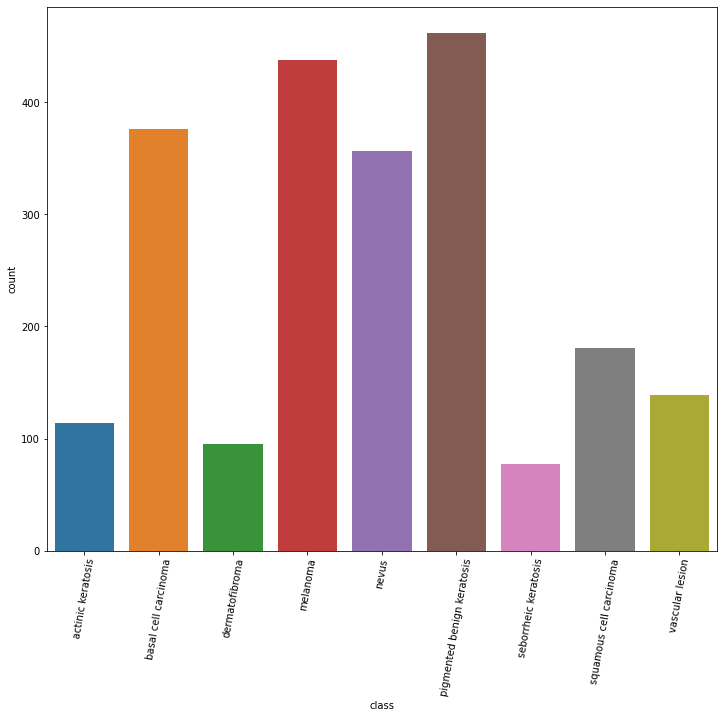

In [30]:
# Plotting the bar graph for each class
plt.figure(figsize=(12, 10))
sns.barplot(x = df['class'], y = df['count'], data = df)
plt.xticks(rotation=80)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

- seborrheic keratosis class has the least number of samples, that is 77

#### - Which classes dominate the data in terms proportionate number of samples?

- pigmented benign keratosis, melanoma and basal cell carcinoma are the top 3 dominant classes wrt the sample count

#### **Todo:** Rectify the class imbalance we can use the Augmentor library to add more images to the existing samples which can help to resolve the class imbalance issue.

#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:

path_to_training_dataset="C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A145E0>: 100%|█| 500/500 [00:01<00:00, 365.22 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB23088C40>: 100%|█| 500/500 [00:01<00:00, 380.05 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A01F00>: 100%|█| 500/500 [00:01<00:00, 389.83 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1CB24A94D30>: 100%|█| 500/500 [00:05<00:00, 84.93 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB2308A230>: 100%|█| 500/500 [00:04<00:00, 103.04 Samples


Initialised with 462 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A739D0>:   3%| | 17/500 [00:00<00:12, 39.40 Samples/s

Error writing 36a3c933-b6f5-4b5b-81a6-b818dea3b584, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025699.jpg_36a3c933-b6f5-4b5b-81a6-b818dea3b584.jpg'. Change save_format to PNG?Error writing 53a959a7-39c0-47c3-b519-9d1257ad8550, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028209.jpg_53a959a7-39c0-47c3-b519-9d1257ad8550.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 8e50c25a-f91f-474c-8865-de7737df7fda, 

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A94490>:   6%| | 28/500 [00:00<00:03, 148.63 Samples/

Error writing 192176d7-c146-48fb-a9db-72ae7ca6b255, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027771.jpg_192176d7-c146-48fb-a9db-72ae7ca6b255.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d5d34172-a4c7-4427-b23e-6e3a874f3a3b, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027151.jpg_d5d34172-a4c7-4427-b23e-6e3a874f3a3b.jpg'. Change save_format to PNG?
You can change the save format using the set_save_f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A716C0>:  12%| | 58/500 [00:00<00:02, 158.14 Samples/

Error writing 3e14107a-29a0-4dd5-b953-e9994334f910, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026842.jpg_3e14107a-29a0-4dd5-b953-e9994334f910.jpg'. Change save_format to PNG?Error writing 3ffb1f57-3ade-441f-ae41-9d62004ab1f7, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026416.jpg_3ffb1f57-3ade-441f-ae41-9d62004ab1f7.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.

You can change the save format using the set_save_f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A73010>:  13%|▏| 64/500 [00:00<00:02, 169.70 Samples/

Error writing a1b9d19f-fe58-4197-810c-6e6d73781e63, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027270.jpg_a1b9d19f-fe58-4197-810c-6e6d73781e63.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing a132e816-69ba-4bba-9749-049fd74f78d7, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026205.jpg_a132e816-69ba-4bba-9749-049fd74f78d7.jpg'. Change save_format to PNG?
You can change the save format using the set_save_f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB24A720E0>:  18%|▏| 92/500 [00:00<00:02, 175.94 Samples/

Error writing 5921aa93-c8f7-4c87-8316-b50c1642c2a2, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0028180.jpg_5921aa93-c8f7-4c87-8316-b50c1642c2a2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 4590ef66-b9a6-4936-879a-c1a1ba27e7b2, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0026790.jpg_4590ef66-b9a6-4936-879a-c1a1ba27e7b2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB2315B490>:  19%|▏| 96/500 [00:00<00:02, 175.94 Samples/

Error writing 4dd4c3e0-f829-46f0-b8e8-0f24d56fa8d1, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025915.jpg_4dd4c3e0-f829-46f0-b8e8-0f24d56fa8d1.jpg'. Change save_format to PNG?Error writing 963167b8-1477-4237-8419-d134aca70135, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027509.jpg_963167b8-1477-4237-8419-d134aca70135.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 5fe1365d-412f-4b27-8f98-247c77261401, 

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB2315BF70>:  25%|▎| 125/500 [00:00<00:02, 165.35 Samples

Error writing 4068d338-1aee-4025-80bd-31d682be9d76, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027388.jpg_4068d338-1aee-4025-80bd-31d682be9d76.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 98f66414-3ac5-4eeb-91d9-5fc4ce8c30ab, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025753.jpg_98f66414-3ac5-4eeb-91d9-5fc4ce8c30ab.jpg'. Change save_format to PNG?
You can change the save format using the set_save_f

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CB231EC100>:  26%|▎| 131/500 [00:00<00:

Error writing 4f8f772d-0b55-41ba-bd43-78d7fa20ee17, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025387.jpg_4f8f772d-0b55-41ba-bd43-78d7fa20ee17.jpg'. Change save_format to PNG?Error writing 2b7f74d1-47ec-467e-9c9d-52c1fae078a8, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027139.jpg_2b7f74d1-47ec-467e-9c9d-52c1fae078a8.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 94b50b00-2c50-4d1e-b1b8-98ff6f8aa40b, 

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CB23158910>:  34%|▎| 168/500 [00:00<00:

Error writing 2ded87a5-7c4f-451d-962c-b39f298cdd26, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027954.jpg_2ded87a5-7c4f-451d-962c-b39f298cdd26.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing 5268f8dd-ca3f-41d3-bd2b-ce278b035ad0, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0027973.jpg_5268f8dd-ca3f-41d3-bd2b-ce278b035ad0.jpg'. Change save_format to PNG?
You can change the save format using the set_save_f

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CB231EC4F0>:  37%|▎| 183/500 [00:00<00:

Error writing c15c15d5-ad8e-48c5-b170-616041983258, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0024881.jpg_c15c15d5-ad8e-48c5-b170-616041983258.jpg'. Change save_format to PNG?
You can change the save format using the set_save_format(save_format) function.
By passing save_format="auto", Augmentor can save in the correct format automatically.
Error writing d1374f9d-2482-4db8-b508-73117e1196f2, [Errno 2] No such file or directory: 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\pigmented benign keratosis\\output\\pigmented benign keratosis_original_ISIC_0025032.jpg_d1374f9d-2482-4db8-b508-73117e1196f2.jpg'. Change save_format to PNG?
You can change the save format using the set_save_f

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB231EE2F0>: 100%|█| 500/500 [00:01<00:00, 417.96 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1CB22EF1570>: 100%|█| 500/500 [00:02<00:00, 212.15 Sample


Initialised with 181 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1CB231EE110>: 100%|█| 500/500 [00:01<00:


Initialised with 139 image(s) found.
Output directory set to C:\Users\kanik\Documents\upgrade-python-classes\Deep_learning\Convolutional-Neural-Networks-main\Melanoma Detection Assignment\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1CB22F78250>: 100%|█| 500/500 [00:01<00:00, 384.72 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print("Path list new :: {} & len of path list new :: {}".format(path_list_new, len(path_list_new)))

Path list new :: ['C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0ba1303d-ef07-42b4-a2ec-ff7aae73aa94.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5f8f6944-7975-41cd-9308-bca077e9d788.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c232f2c7-2920-43c5-a67b-04618fd42eb7.jpg', 'C:\\Users\\kanik\\Documents\\upgrade-python-classes\\Deep_learning\\Convolutional-Neural-Networks-main\\Melanoma Detection Assignment\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.j

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [36]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [38]:
new_df['Label'].value_counts()

melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
pigmented benign keratosis    462
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [40]:

#"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6239 files belonging to 9 classes.
Using 4992 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6239 files belonging to 9 classes.
Using 1247 files for validation.


In [42]:
# checking the class names
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [43]:
# Autotune
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model III with added samples using Augmentor library

#### **Todo:** Create your model (make sure to include normalization)

In [44]:
# creating the sequential model with rescaling, 3 conv, 3 maxpooling, 3 dropouts and 2 dense layers
model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # dropout layer
  layers.Dropout(0.25),
    #2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # dropout layer
  layers.Dropout(0.25),
    #3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # dropout layer
  layers.Dropout(0.25),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output layer with softmax
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [45]:
# compiling the model with adam optimizer and sparse_categorical_crossentropy loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*** Model Summary ***

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

#### **Todo:**  Train your model

In [47]:
# trainig the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
156/156 [==============================] - 39s 224ms/step - loss: 2.0932 - accuracy: 0.2252 - val_loss: 1.7743 - val_accuracy: 0.2895
Epoch 2/30
156/156 [==============================] - 35s 224ms/step - loss: 1.6912 - accuracy: 0.3347 - val_loss: 1.6080 - val_accuracy: 0.3913
Epoch 3/30
156/156 [==============================] - 35s 223ms/step - loss: 1.4650 - accuracy: 0.4553 - val_loss: 1.4207 - val_accuracy: 0.4515
Epoch 4/30
156/156 [==============================] - 35s 223ms/step - loss: 1.3112 - accuracy: 0.5004 - val_loss: 1.3197 - val_accuracy: 0.4876
Epoch 5/30
156/156 [==============================] - 35s 226ms/step - loss: 1.1910 - accuracy: 0.5557 - val_loss: 1.2193 - val_accuracy: 0.5613
Epoch 6/30
156/156 [==============================] - 35s 225ms/step - loss: 1.0839 - accuracy: 0.5968 - val_loss: 1.1395 - val_accuracy: 0.5734
Epoch 7/30
156/156 [==============================] - 36s 228ms/step - loss: 0.9704 - accuracy: 0.6460 - val_loss: 0.9882 - val_ac

#### **Todo:**  Visualize the model results

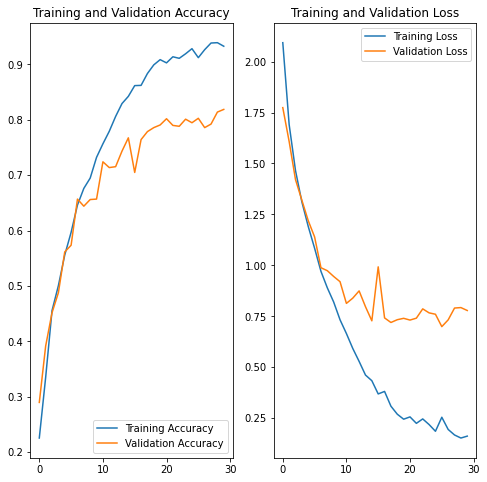

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Findings

Finally we could handle both overfitting and class imbalance issue and the model performance has increased considerably.
train accuracy 93% and validation accuracy 81.80%